# Comparison to old model - final plots

In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import copy
from matplotlib.ticker import ScalarFormatter

from methods.SolutionClass2 import SolutionClass, _find_limits
from methods.save_load_data2 import save_data, load_data
from methods.make_input import make_plasma_input

## NORMAL STEP

In [2]:
params = make_plasma_input()
x_len = (params["grid"]["x"][1]-params["grid"]["x"][0])
params["init"]["type"] = "soft-step"
params["init"]["alpha"] = 0.2
params["init"]["x_a"] = 0.0
params["init"]["n_l"] = 1
params["init"]["n_r"] = 0.2
params["init"]["t_l"] = 1
params["init"]["t_r"] = 0.2 #0.2
params["grid"]["Nx"]= 600
params["output"]["maxout"] = 400
params["output"]["tend"] = 5e-2 #1e-4 to 1e-2
params["timestepper"]["type"] = "ARK"
params["timestepper"]["tableau"]  = "ARK-4-2-3"
params["poisson"]["eps"]= 1e-12
params["poisson"]["type"] = "bicgstab"
params["physical"]["tau"] = 1
params["physical"]["type"] = "original"
params["advection"] = {"type" : "staggered", "variant" : "slope-limiter-explicit"}
params["timestepper"]["rtol"] = 1e-5

if 'sols' not in locals():
    sol_new = SolutionClass(params)
    params["physical"]["mu"] *= -1  # Have to invert the value of mu?!
    sol_old = SolutionClass(params, two_fluid_file="../plasma")  # Runs with the old non-temperature system

    sols = [sol_new, sol_old]

Error: No temperature fields found. Setting to constant
Error: No temperature fields found. Setting to constant


- Densities don't have time to change so they are omitted

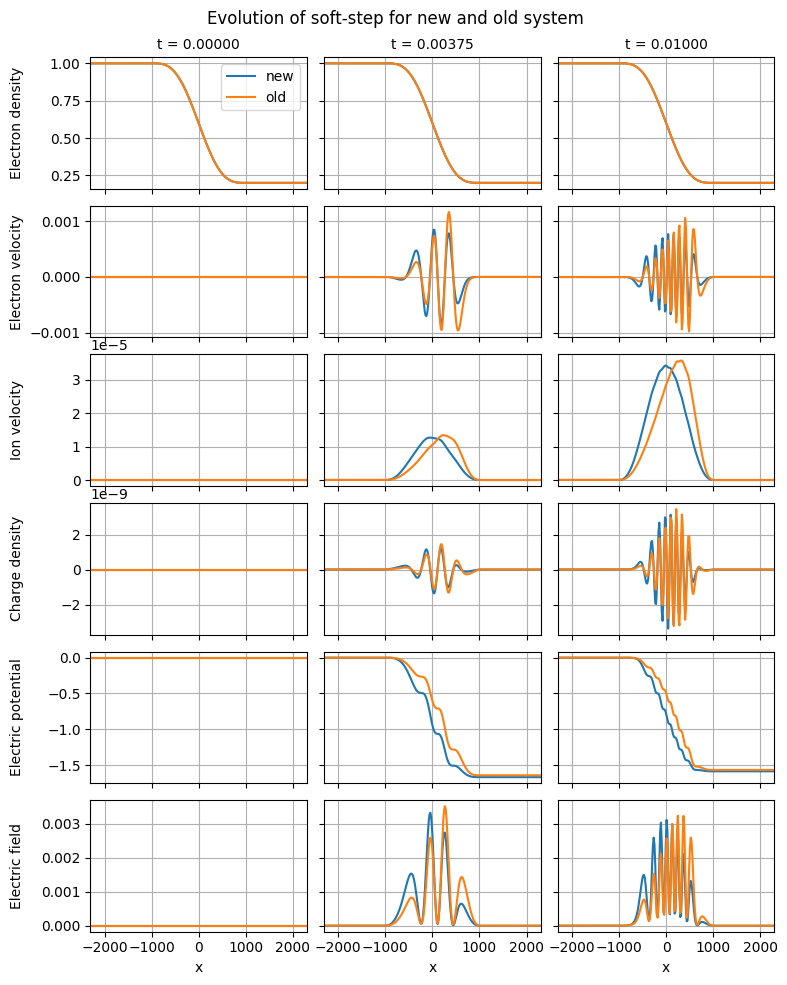

In [3]:
data_to_plot = ["ne", "ue", "ui", "charge", "potential", "electric"]
labels       = ["Electron density", "Electron velocity", "Ion velocity", "Charge density", "Electric potential", "Electric field"]

ti     = (0, 30, 80)
xrange = (-2300, 2300)

ncols = len(ti)
nrows = 6

fig, axes = plt.subplots(nrows, ncols, figsize=(8, 10), sharex=True, sharey='row')

for sol in sols:
    data_full = sol.get_data_full()
    x = data_full["x"]
    t = data_full["t"]

    # Rows
    for i, Ti in enumerate(ti):
        axes[0][i].plot(x, data_full["ne"][Ti,:])
        axes[1][i].plot(x, data_full["ue"][Ti,:])
        axes[2][i].plot(x, data_full["ui"][Ti,:])
        axes[3][i].plot(x, data_full["charge"][Ti,:])
        axes[4][i].plot(x, data_full["potential"][Ti,:])
        axes[5][i].plot(x, data_full["electric"][Ti,:])

        axes[0][i].set_title(f"t = {t[Ti]:.5f}", fontsize=10)

        axes[-1][i].set_xlabel("x")

    # All axes
    for ax in itertools.chain(*axes):
        ax.grid(True)
        ax.set_xlim(xrange)

    # Left columns axes
    for i, ax in enumerate(axes.T[0]):
        ax.set_ylabel(labels[i])

axes[0][0].legend(["new", "old"])
axes[0][0].ticklabel_format(scilimits=(-2, 4))

fig.suptitle("Evolution of soft-step for new and old system")
fig.tight_layout()
fig.subplots_adjust(wspace = 0.08, hspace = 0.13)
fig.align_ylabels()

plt.savefig("Figures/Comparison soft-step", dpi=400)

## ADIABATIC STEP

In [4]:
params = make_plasma_input()
x_len = (params["grid"]["x"][1]-params["grid"]["x"][0])
params["init"]["type"] = "soft-step"
params["init"]["alpha"] = 0.04
params["init"]["x_a"] = 0.0
params["init"]["n_l"] = 1
params["init"]["n_r"] = 0.2
params["init"]["t_l"] = 1
params["init"]["t_r"] = 1
params["grid"]["Nx"]= 600
params["output"]["tend"] = 1.25e3
params["output"]["maxout"] = 300
params["timestepper"]["type"] = "ARK"
params["timestepper"]["tableau"]  = "ARK-4-2-3"
params["poisson"]["eps"]= 1e-12
params["poisson"]["type"] = "anderson"
params["poisson"]["damping"] = 1e-1
params["physical"]["type"] = "adiabatic"
params["physical"]["tau"] = 1
params["physical"]["resistivity"] = 0.0

if 'sols_adiabatic' not in locals():
    sol_new = SolutionClass(params)
    print("test")
    params["physical"]["mu"] *= -1  # Have to invert the value of mu?!
    sol_old = SolutionClass(params, two_fluid_file="../plasma")  # Runs with the old non-temperature system

    sols_adiabatic = [sol_new, sol_old]

test
Error: No temperature fields found. Setting to constant
Error: No temperature fields found. Setting to constant


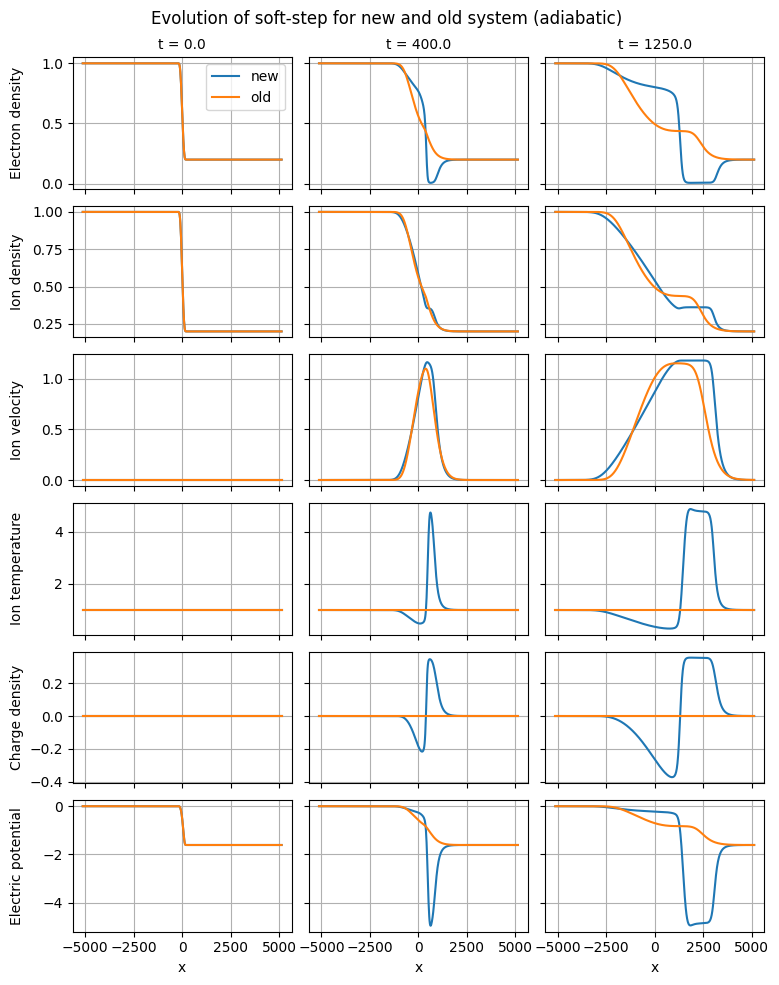

In [5]:
data_to_plot = ["ne", "ni", "ui", "Ion velocity", "charge", "potential"]
labels       = ["Electron density", "Ion density", "Ion velocity", "Ion temperature", "Charge density", "Electric potential"]

ti     = (0, 96, 300)
xrange = None

ncols = len(ti)
nrows = 6

fig, axes = plt.subplots(nrows, ncols, figsize=(8, 10), sharex=True, sharey='row')

for sol in sols_adiabatic:
    data_full = sol.get_data_full()
    x = data_full["x"]
    t = data_full["t"]

    # Rows
    for i, Ti in enumerate(ti):
        axes[0][i].plot(x, data_full["ne"][Ti,:])
        axes[1][i].plot(x, data_full["ni"][Ti,:])
        axes[2][i].plot(x, data_full["ui"][Ti,:])
        axes[3][i].plot(x, data_full["Ti"][Ti,:])
        axes[4][i].plot(x, data_full["charge"][Ti,:])
        axes[5][i].plot(x, data_full["potential"][Ti,:])

        axes[0][i].set_title(f"t = {t[Ti]:.1f}", fontsize=10)

        axes[-1][i].set_xlabel("x")

    # All axes
    for ax in itertools.chain(*axes):
        ax.grid(True)
        ax.set_xlim(xrange)

    # Left columns axes
    for i, ax in enumerate(axes.T[0]):
        ax.set_ylabel(labels[i])

axes[0][0].legend(["new", "old"])
axes[0][0].ticklabel_format(scilimits=(-2, 4))

fig.suptitle("Evolution of soft-step for new and old system (adiabatic)")
fig.tight_layout()
fig.subplots_adjust(wspace = 0.08, hspace = 0.13)
fig.align_ylabels()

plt.savefig("Figures/Comparison soft-step (adabatic)", dpi=400)